<h1><center>Laboratorio 5: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza y Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano y Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: José Saffie
- Nombre de alumno 2: Matías López

### **Link de repositorio de GitHub:** `https://github.com/JoseSaffie/MDS7202-1-Primavera-2023.git`

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- **Grupos de máximo 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manipular datos tabulares.
- Utilizar `plotly` para obtener información gráfica del dataset.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd 

from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades.csv```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# 1. Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente). 

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`. 


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos. 

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

In [3]:
df1 = pd.read_json('students_grades_1.json')
df2 = pd.read_json('students_grades_2.json')

df_grades = pd.concat([df1, df2], axis=0)

Resultado esperado:

In [4]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## Análisis de Las Notas v2 [0.5 Cada gráfico + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta: 

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.


**Gráfico de Caja:**

In [5]:
import plotly.graph_objects as go

# Creamos cada boxplot
fig = go.Figure()
fig.add_trace(go.Box(y=df_grades['math score'], name="math score"))
fig.add_trace(go.Box(y=df_grades['reading score'], name="reading score"))
fig.add_trace(go.Box(y=df_grades['writing score'], name="writing score"))

# Modificamos algunos titulos
fig.update_layout(
    yaxis_title='score',
    legend_title_text='subject')  


# tapamos el x axis
fig.update_xaxes(
    tickmode='array',
    tickvals=[])

fig.show()

**Distplot:**

In [6]:
import plotly.figure_factory as ff
import scipy.stats as stats

#Usamos la data en especifico tal como se describe en la pagina de ref
hist_data = [df_grades['math score'], df_grades['reading score'], df_grades['writing score']]

group_labels = ['math_score', 'reading score', 'writing score']

# Usamos ff y ponemos en falso los graficos que no queremos que aparezcan
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

# Add title
fig.update_layout(title_text='')
fig.show()

**Histograma con Boxplots:**

In [7]:

# Creamos una lista de los elementos del df que no vamos a considerar
hover_columns = ["names", "gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

# Create the histogram figure
fig = px.histogram(df_grades, marginal="box",  # can be `box`, `violin`
                   hover_data=hover_columns, barmode="group",
                   nbins=20)  # Change the number of bins as needed

# funcion para customizar textos deñ graficos
fig.update_layout(
    xaxis_title="grades",    
    yaxis_title="count",
    legend_title_text='subjects'
         
)

# Show the figure
fig.show()


**Histograma con Faceta:**

In [8]:
# Copiamos el df para no tener problemas
df_grades2 = df_grades.copy()
df_grades2 = df_grades2[['names','math score', 'reading score', 'writing score']]
# USAMOS el hint
df_melted = pd.melt(df_grades2, id_vars=['names'], var_name='subject', value_name='grade')

#  hacemos el histograma con la base melteada
fig = px.histogram(df_melted, x="grade", color='subject', facet_row="subject",nbins=20)
fig.update_yaxes(matches=None)
fig.show()

**Justifique:**

```
Escriba aquí su justificación
```

> 1. ¿Existe una diferencia notable entre las notas?

En general no se nota mucha diferencia entre las notas para distintas asignaturas, se ve que tiene una distribucion no.rmal para todas las asignaturas y que matematicas tiene un promedio en general más bajo que el resto de asignaturas, escritura y lectura tienene un comportamiento muy similar.

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

Para el rector el que más conviene es el boxplot ya que permitira que sepa los casos borde y que alumnos son los que estan peligrando en cuanto a que si van a repetir, revisando los outliers. A los padres probablemente les interesa sabes cuales son los ramos donde los alumnos estan fallando más de manera rapida, por lo que el distplot seria una muy buena alternativa para que puedan ver cuales son los ramos para refozar a sus hijos. Finalmente para un centro educativos lo ideal seria entregarle la mayor cantidad de informacion para que puedan estudiar con lo que el histograma con boxplots seria muy utili para que puedan tener la mayor cantidad de información para estudiar.



## Análisis por Nivel Educacional Etnia de los Padres [1.5 Puntos]

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos. 
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### Tabla de Resumen

Para generar la tabla de resumen:

- [X] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [X] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión: 

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas. 
- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [X] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'. 


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

### 1.3.4 Información por Categorías [1 punto]

In [9]:
df_grades3 = df_grades.copy()

def alumnos_promedio(dataframe_in):
  
  #Calculamos el promedio a partir de las 3 notas
  dataframe_in['GPA'] = (dataframe_in['math score']+dataframe_in['writing score']+dataframe_in['reading score'])/3

  #Redondeamos
  dataframe_in['GPA'] = dataframe_in['GPA'].round(2)
  
  return dataframe_in

df_grades3 = alumnos_promedio(df_grades3)

######################### X
# Realizamos el mape que nos proponen
parental_mapping = {
    'some high school': 'school',
    'some college': 'school',
    'high school': 'school',
    "bachelor's degree": 'college',
    "associate's degree": 'college',
    "master's degree": 'postgraduate'
}

# aplicamos el mapeo y lo guardamos en la columna que se nos pide
df_grades3['simple parental level of education'] = df_grades3['parental level of education'].map(parental_mapping)

df_grades3
######################### X
# Agrupamos y realizamos las agregaciones necesarias
grouped_stats = df_grades3.groupby(['race/ethnicity', 'simple parental level of education']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean',
    'GPA': 'mean',
    'names': 'count'
}).round(2)
grouped_stats

# Calcula el porcentaje
grouped_stats['percentage'] = (grouped_stats['names'] / grouped_stats['names'].sum() * 100).map(lambda x: f'{x:.2f}%')

# Cambiar nombre de una columna de names a count
grouped_stats.rename(columns={'names': 'count'}, inplace=True)


grouped_stats

math score  reading score  \
race/ethnicity simple parental level of education                              
group A        college                                   4.74           5.00   
               postgraduate                              4.69           5.23   
               school                                    4.57           4.73   
group B        college                                   5.07           5.26   
               postgraduate                              4.91           5.69   
               school                                    4.69           4.89   
group C        college                                   5.02           5.37   
               postgraduate                              4.92           5.14   
               school                                    4.76           5.02   
group D        college                                   5.11           5.25   
               postgraduate                              5.22           5.54   
               school                                    5.02           5.13   
group E        college                                   5.54           5.45   
               postgraduate                              5.54           6.03   
               school                                    5.40           5.31   

                                                   writing score   GPA  count  \
race/ethnicity simple parental level of education                               
group A        college                                      4.89  4.88     24   
               postgraduate                                 5.35  5.09      2   
               school                                       4.56  4.62     51   
group B        college                                      5.19  5.18     54   
               postgraduate                                 5.55  5.38      5   
               school                                       4.76  4.78    107   
group C        college                                      5.35  5.25    102   
               postgraduate                                 5.10  5.06     15   
               school                                       4.92  4.90    155   
group D        college                                      5.25  5.20     70   
               postgraduate                                 5.73  5.50     20   
               school                                       5.11  5.09    149   
group E        college                                      5.45  5.48     52   
               postgraduate                                 5.89  5.82      6   
               school                                       5.16  5.29     63   

                                                  percentage  
race/ethnicity simple parental level of education             
group A        college                                 2.74%  
               postgraduate                            0.23%  
               school                                  5.83%  
group B        college                                 6.17%  
               postgraduate                            0.57%  
               school                                 12.23%  
group C        college                                11.66%  
               postgraduate                            1.71%  
               school                                 17.71%  
group D        college                                 8.00%  
               postgraduate                            2.29%  
               school                                 17.03%  
group E        college                                 5.94%  
               postgraduate                            0.69%  
               school                                  7.20%

**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

In [10]:

# Creamos el grafico con px
fig = px.box(df_grades3, x='simple parental level of education', y='GPA', color='race/ethnicity',
             title='Box Plot de GPA por Nivel Educacional y Etnicidad')

# show
fig.show()

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

```
Escriba aqui su respuesta
```

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?

A partir del boxplot se puede observar que para el nivel educacional school y college, los GPA segun la etnia de los padres sigue el mismo patron, indicando que entre estos niveles educacionales no hay una diferencia significativa en los promedios de los alumnos. Por otra parte, observando solo la variable nivel educacional, para postgraduate los intervalos cambian hacia arriba, es decir, mejores promedio, lo que indicaria que cuando los papas tienen nivel de estudio postgraduate, si tiene una correlacion con el rendimiento de sus hijos. Ahora en cuanto a la etnia, se puede observar que para los 3 niveles de educacion, los grupos etnicos siguen un patron similar respecto al GPA, lo que indica que hay una correlacion entre la etnia y el promedio de los alumnos. Un ejemplo de esto son los grupos A y C , donde se puede observar que sin importar el nivel educacion de los padres, estos grupos de alumnos son los que tienen peor rendimiento escolar dada la etnia. 

> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

Si, podemos notar perfectamente como se relacionan y como varian según si se mire la educación o si se compara la etnia, gracias a los colores se pueden hacer comparaciones efectivas entre educaciones, y para el valor de la educacion se puede comparar el conjunto de manera rápida e interpetativa.

# 1.3.5 Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias. 
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.
 
 
El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`). 


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**


- [X] Cargar el `other_grades.csv`
- [X] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [X] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [X] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.
> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

In [11]:
# Carga la base de datos
nuevos_grades = pd.read_csv('other_grades.csv')
nuevos_grades.head()

,names,science score,history score
0,Pam Otoole,57,4.0
1,Diane Olson,48,4.8
2,Sarah Flannery,72,6.1
3,Stanley Chappell,47,3.7
4,Arnold Dodson,60,5.2


In [12]:
# Unir con outer join
outer_merged_df = pd.merge(
    left=df_grades3,
    right=nuevos_grades,
    on="names",
    sort=True,
    how="outer",
)
outer_merged_df
outer_merged_df

# Este merge no nos sirve ya que vuelve a agregar a los alumnos que estan corruptos, la idea de este merge es que aparezcan todas
# las filas que hay en ambas tablas, vemos que hay 1000 filas eso es malo.

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,school,46,4.6
1,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,college,48,3.9
2,Adam Romero,male,group C,high school,standard,completed,4.18,4.12,3.94,4.08,school,42,3.2
3,Agatha Bergman,female,group D,master's degree,standard,none,6.52,7.00,7.00,6.84,postgraduate,92,5.2
4,Agnes Dobbs,female,group C,master's degree,free/reduced,completed,4.90,5.86,5.86,5.54,postgraduate,65,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,William Tang,male,group D,associate's degree,standard,none,5.50,5.08,4.84,5.14,college,52,4.7
996,Willie Gilbert,male,group E,some high school,standard,none,5.92,5.02,4.66,5.20,school,73,3.8
997,Willie Neff,female,group E,associate's degree,free/reduced,none,5.38,5.56,5.68,5.54,college,58,4.6
998,Willie Nicholson,female,group D,some college,free/reduced,completed,4.78,5.80,5.80,5.46,school,63,4.8


In [13]:
# Unir con left join

left_join = pd.merge(
    left=df_grades3,
    right=nuevos_grades,
    on="names",
    how="left",
    sort=True,
)

left_join 
# Left join parece una buena alternativa ya que toma de base la base de datos que esta buena y luego agregar la nota de ciencia y historia
# Solo para aquellos alumnos los cuales estan en la base original, además dejaria aquellos alumnos que no tienen notas de historia o ciencia
# con na's. vemos que hay 875 filas, es bueno

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,school,46,4.6
1,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,college,48,3.9
2,Adam Romero,male,group C,high school,standard,completed,4.18,4.12,3.94,4.08,school,42,3.2
3,Agatha Bergman,female,group D,master's degree,standard,none,6.52,7.00,7.00,6.84,postgraduate,92,5.2
4,Agnes Dobbs,female,group C,master's degree,free/reduced,completed,4.90,5.86,5.86,5.54,postgraduate,65,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,William Saska,male,group B,associate's degree,standard,none,4.66,3.52,3.46,3.88,college,54,2.8
871,William Tang,male,group D,associate's degree,standard,none,5.50,5.08,4.84,5.14,college,52,4.7
872,Willie Gilbert,male,group E,some high school,standard,none,5.92,5.02,4.66,5.20,school,73,3.8
873,Willie Neff,female,group E,associate's degree,free/reduced,none,5.38,5.56,5.68,5.54,college,58,4.6


In [14]:
# Unir con right join

right_join = pd.merge(
    left=df_grades3,
    right=nuevos_grades,
    on="names",
    how="right",
    sort=True,
)

right_join 

# Lo mismo que el left join pero toma de referencia como base original la base mala, como estan todos los nombres funciona bien
# en ese sentido pero mantiene todos los datos corruptos, por lo que no seria una muy buena opción, si se invierte las bases de izq
# a derecha tendria el mismo efecto que el left join, vemos que hay 1000 filas eso es malo

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,school,46,4.6
1,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,college,48,3.9
2,Adam Romero,male,group C,high school,standard,completed,4.18,4.12,3.94,4.08,school,42,3.2
3,Agatha Bergman,female,group D,master's degree,standard,none,6.52,7.00,7.00,6.84,postgraduate,92,5.2
4,Agnes Dobbs,female,group C,master's degree,free/reduced,completed,4.90,5.86,5.86,5.54,postgraduate,65,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,William Tang,male,group D,associate's degree,standard,none,5.50,5.08,4.84,5.14,college,52,4.7
996,Willie Gilbert,male,group E,some high school,standard,none,5.92,5.02,4.66,5.20,school,73,3.8
997,Willie Neff,female,group E,associate's degree,free/reduced,none,5.38,5.56,5.68,5.54,college,58,4.6
998,Willie Nicholson,female,group D,some college,free/reduced,completed,4.78,5.80,5.80,5.46,school,63,4.8


In [15]:
# Unir con inner join

inner_join = pd.merge(
    left=df_grades3,
    right=nuevos_grades,
    on="names",
    how="inner",
    sort=True,
)

inner_join

# El inner join en este caso va mostrar solo filas cuando existen la misma llave para ambos datos, osea si no hay match, el dato no va a
# aparecer bajo ningun motivo, en este caso los other_grades contiene a todos los nombres de, students grades, asique al final va a 
# resultar en la misma tabla que el left join, ya que de los  875 que estan contenidos en los 1000.

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA,simple parental level of education,science score,history score
0,Aaron Oakden,male,group D,high school,free/reduced,none,4.96,5.44,5.14,5.18,school,46,4.6
1,Aaron Shelly,male,group D,associate's degree,standard,none,4.66,3.88,3.76,4.10,college,48,3.9
2,Adam Romero,male,group C,high school,standard,completed,4.18,4.12,3.94,4.08,school,42,3.2
3,Agatha Bergman,female,group D,master's degree,standard,none,6.52,7.00,7.00,6.84,postgraduate,92,5.2
4,Agnes Dobbs,female,group C,master's degree,free/reduced,completed,4.90,5.86,5.86,5.54,postgraduate,65,5.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,William Saska,male,group B,associate's degree,standard,none,4.66,3.52,3.46,3.88,college,54,2.8
871,William Tang,male,group D,associate's degree,standard,none,5.50,5.08,4.84,5.14,college,52,4.7
872,Willie Gilbert,male,group E,some high school,standard,none,5.92,5.02,4.66,5.20,school,73,3.8
873,Willie Neff,female,group E,associate's degree,free/reduced,none,5.38,5.56,5.68,5.54,college,58,4.6


> **Respuesta**: 
En este caso el mejor join para estos datos va ser el left join o el inner join, el left join nos va a permitr guardar aquellos alumnos que no tienen notas de ciencia y/o notas de historia por lo que ahi va a depender si eso se considera como un error o no, en el caso que eso no sea un error es importante utilizar el left join para no hacer desaparecer alumnos. Por otro lado si consideramos que si o si tienen que estar todas las notas de los alumnos en el sistema tenemos que utilizar un inner join para que este elimine todas las filas de aquellos alumnos que no tiene notas finales para todas las asignaturas.

## 1.4 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>



Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

In [18]:
pip install seaborn



     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00


c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



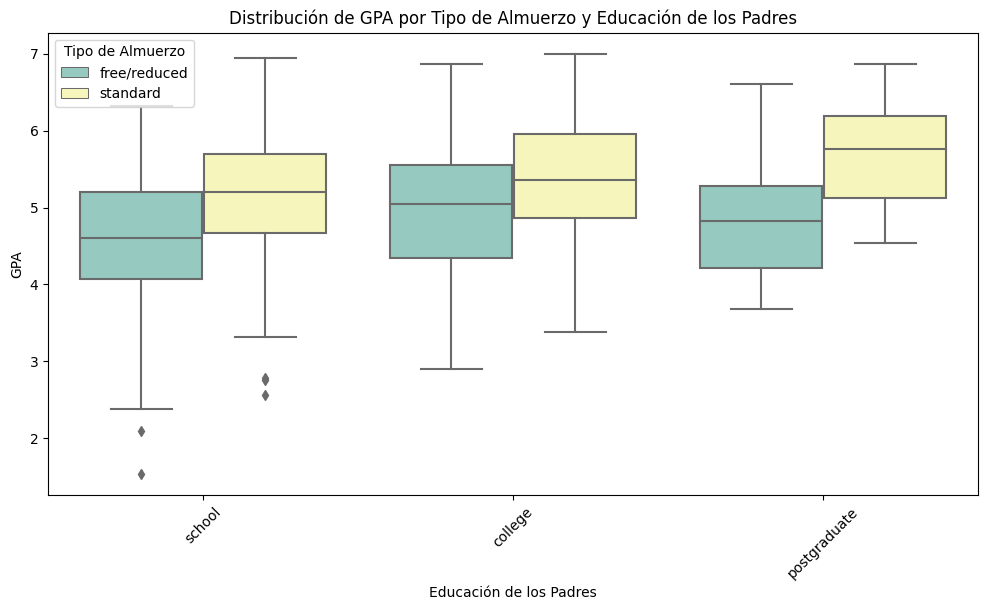

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado nuevos_grades con tus datos
# nuevos_grades = ...

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=left_join, x='simple parental level of education', y='GPA', hue='lunch', palette='Set3')

# Personalizar el gráfico
plt.title('Distribución de GPA por Tipo de Almuerzo y Educación de los Padres')
plt.xlabel('Educación de los Padres')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Almuerzo', loc='upper left')

# Mostrar el gráfico
plt.show()

A partir de este grafico se puede observar que sin importar el tipo de educacion de los padres, los alumnos que tienen almuerzo estandar, tienen mejores GPA. El tipo de almuerzo puede estar muy relacionado con el nivel socioeconomico de la familia, lo que indicaria que los alumnos que con almuerzo free/reduced, vienen de familias con menos recursos, lo que puede estar impactando en su calidad de vida y rendimiento escolar.

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



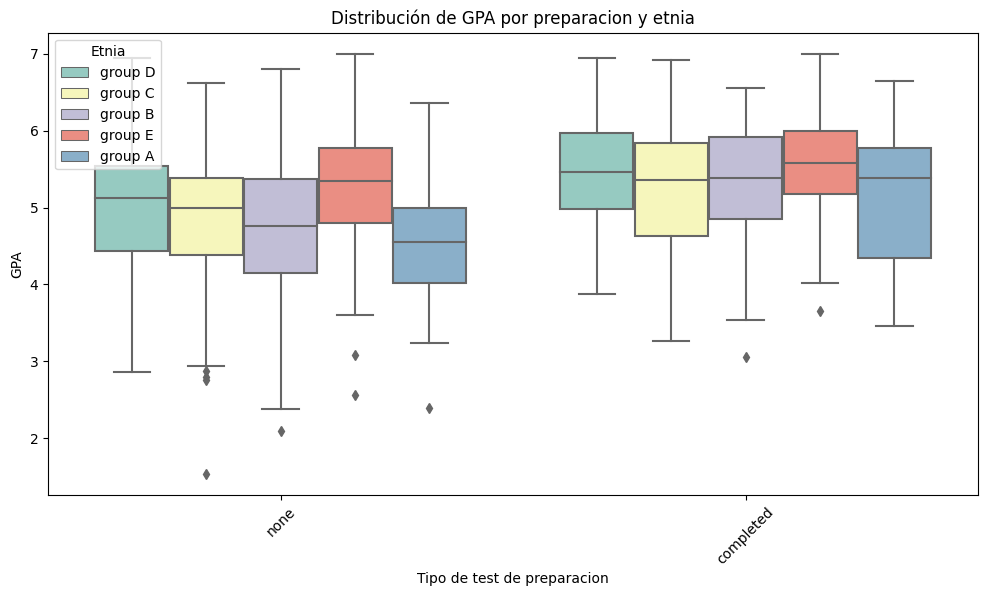

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado nuevos_grades con tus datos
# nuevos_grades = ...

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=left_join, x='test preparation course', y='GPA', hue='race/ethnicity', palette='Set3')

# Personalizar el gráfico
plt.title('Distribución de GPA por preparacion y etnia')
plt.xlabel('Tipo de test de preparacion')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.legend(title='Etnia', loc='upper left')

# Mostrar el gráfico
plt.show()

A partir de este grafico se puede observar que al hacer el test de preparacion, las diferencias que existen entre alumnos de diferentes etnias, se ven igualadas al hacer este test. Es decir, podemos observar que el test de preparacion si influye en el promedio a nivel general de los alumnos, haciendo que los alumnos que tienen mas desventajas sean nivelados.

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\GE62VR 6RF\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



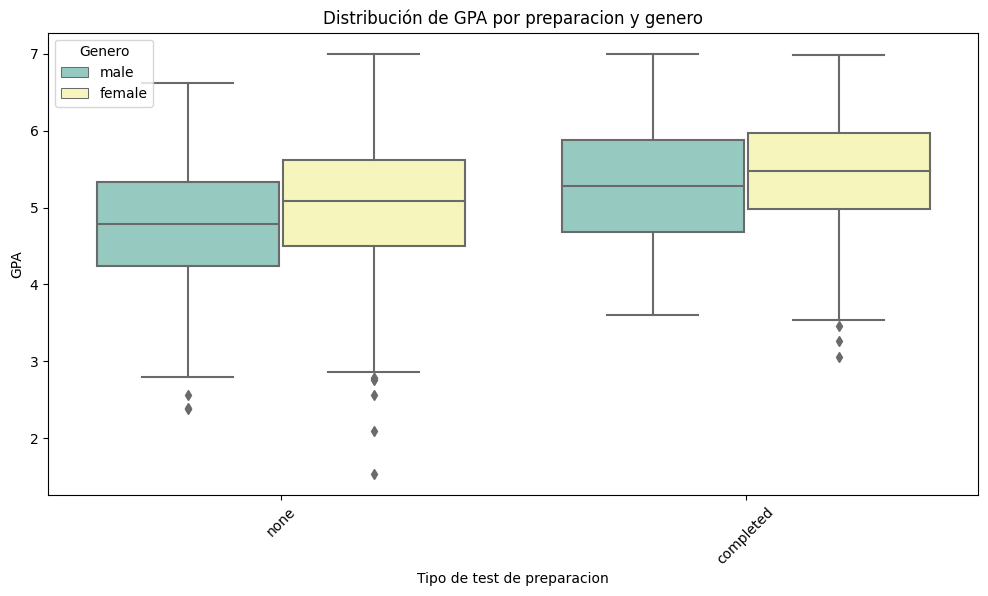

In [34]:
# Supongamos que tienes un DataFrame llamado nuevos_grades con tus datos
# nuevos_grades = ...

# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=left_join, x='test preparation course', y='GPA', hue='gender', palette='Set3')

# Personalizar el gráfico
plt.title('Distribución de GPA por preparacion y genero')
plt.xlabel('Tipo de test de preparacion')
plt.ylabel('GPA')
plt.xticks(rotation=45)
plt.legend(title='Genero', loc='upper left')

# Mostrar el gráfico
plt.show()

Este es el mismo grafico anterior, donde tambien se puede observar que los alumnos al hacer el test de preparacion si suben sus notas, tanto hombres como mujeres.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y que **los días de atraso no se pueden utilizar para entregas de lab** solo para tareas. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>